<a href="https://colab.research.google.com/github/Ghoshtobhaja/ML_Siddhart_Ghosh_Red_wine_quality/blob/main/ML_Siddharth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries 
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns   

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data set
df = pd.read_csv('/content/drive/MyDrive/Major_Project_Siddharth_Ghosh/winequality-red.csv')


In [ ]:
df.head()         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0, 0.5, 'quality')

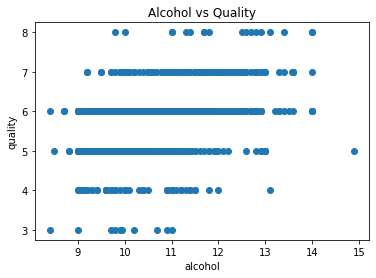

In [ ]:
# Plot Alcohol vs Quality
plt.scatter(df['alcohol'],df['quality'])
plt.title('Alcohol vs Quality')
plt.xlabel('alcohol')
plt.ylabel('quality')

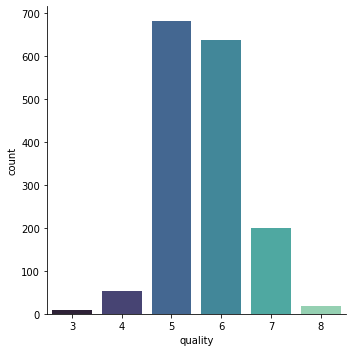

In [ ]:
#Count plot of Quality
sns.catplot(x='quality',data=df,kind='count', palette = "mako")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

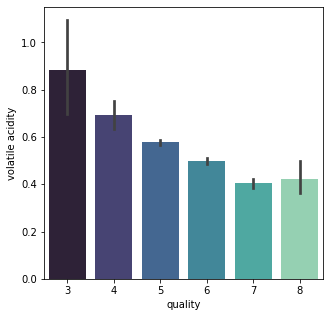

In [ ]:
# Quality vs Volatile Acidity
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df, palette = "mako")

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

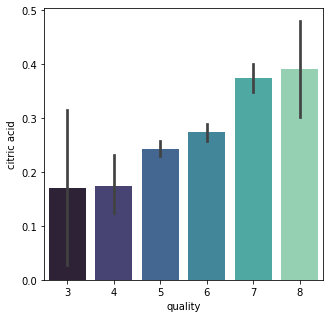

In [ ]:
# Quality vs Citric Acid
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data =df, palette = "mako")

<AxesSubplot:>

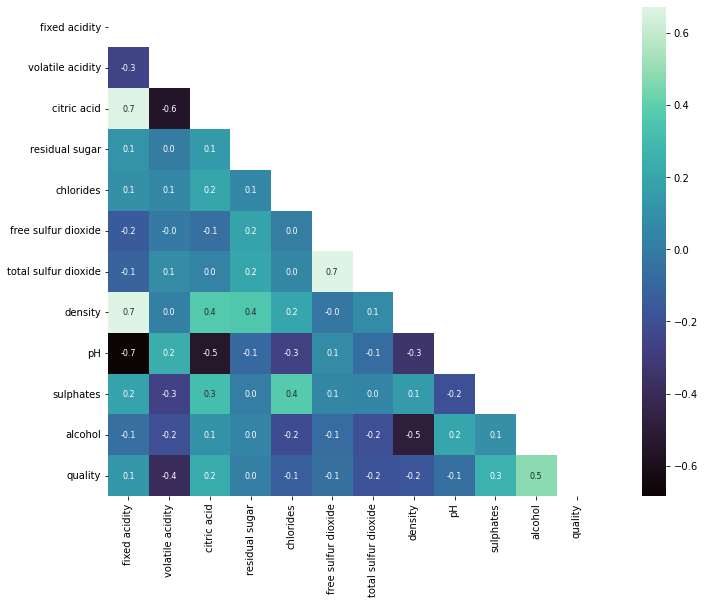

In [ ]:
# Correlation
plt.figure(figsize=(16,9)) #set fig size
mask = np.triu(np.ones_like(df.corr())) #Return copy of array with upper part of the triangle
sns.heatmap(df.corr(),annot=True,square=True,fmt=".1f",annot_kws={"size":8},cmap='mako', mask = mask)

In [ ]:
# Classifying the quality column in 0 and 1
df['quality'] = df['quality'].apply(lambda yval:1 if yval>=7 else 0)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
# Splitting dataframe
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [ ]:
#X and y split for train and test 
X_train = df_train.drop('quality',axis=1)

y_train = df_train[['quality']]

X_test = df_test.drop('quality',axis=1)

y_test = df_test[['quality']]

print(f'The shape of X_train is: {X_train.shape}\n')
print(f'The shape of y_train is: {y_train.shape}\n')
print(f'The shape of X_test is: {X_test.shape}\n')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (1279, 11)

The shape of y_train is: (1279, 1)

The shape of X_test is: (320, 11)

The shape of y_test is: (320, 1)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Applying ML Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-51-5c985f66e0bd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
print(accuracy_score(X_test_prediction, y_test))

0.934375
